In [3]:
import torch
from PIL import Image
from models.base import BaseModel
from losses import LossCombined
import torchvision.transforms.v2.functional as F
import matplotlib.pyplot as plt
import torchvision.utils as utils
import torchvision

KeyboardInterrupt: 

In [1]:
def load_model(checkpoint_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    # Load the model checkpoint
    model = BaseModel.load_from_checkpoint(checkpoint_path)
    model.to(device)
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = F.to_image(image)
    image = F.to_dtype(image, dtype=torch.float32, scale=True)
    image = F.resize(image, size=[640, 640])
    image = F.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image.unsqueeze(0)

def process_and_overlay_image(image_path, checkpoint_path, model):
    # Load the model
    model.eval()  # Set the model to evaluation mode

    # Load and preprocess the image
    original_image = torchvision.io.read_image(image_path, torchvision.io.ImageReadMode.RGB)
    resized_original_image = F.resize(original_image, size=[640, 640])
    processed_image = preprocess_image(image_path)

    # Run the model
    with torch.no_grad():
        output = model(processed_image)

    probs = torch.sigmoid(output)
    mask = (probs > 0.5)

    drawing = utils.draw_segmentation_masks(image=resized_original_image, masks=mask.squeeze(0), alpha=0.5, colors=[(0, 255, 0)])
    plt.imshow(drawing.permute(1, 2, 0))
    plt.axis("off")

    return original_image, output


In [ ]:
## LOAD MODEL
checkpoint_path =  f"Training on NL Dataset/nxzrqmx6/checkpoints/27-0.85.ckpt"
model = load_model(checkpoint_path)


NameError: name 'torch' is not defined

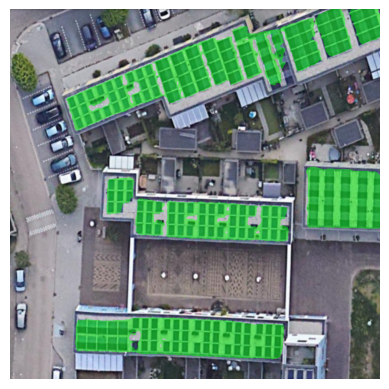

In [8]:
# Specify the paths
image_path = "images/Capture4.PNG"
original_image, prob = process_and_overlay_image(image_path, checkpoint_path, model)
